**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2024
# **Trabajo Práctico 1**
### **Integrantes:**
  * Barracchia, Azul. L.U.: 178/22
  
  * Sigal Aguirre, Mario. L.U.: 157/22

In [ ]:
#imports y dependencias:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp

---
# Ejercicio 1

Sea el siguiente sistema dinámico unidimensional

$$
\dot{x} = -x + S(\rho+cx)
$$

con

$$
S(\rho+cx)=\frac{1}{1+e^{-(\rho+cx)}}
$$

donde la función $S(\rho+cx)$ es la función sigmoidea con la entrada parametrizada en base a los parámetros $\rho$ y $c$.

**1.1.** Se define la funcion S que refleja la funcion sigmoidea $S$ y que cuenta con la posibilidad de fijar los parametros $\rho$ y $c$. Estos valores se definen por default en $\rho = 0$ y $c = 1$ para que el resultado de S(x) coincida con S($\rho$+cx). <br> $S(\rho+cx) = S(0+1x) = S(x)$.

In [ ]:
def S(x,rho=0,c=1):
    return 1/(1+np.exp(-(rho+c*x)))



---



**1.2.** Se estudia graficamente la incidencia de los parámetros $\rho$ y c en la función sigmoidea.

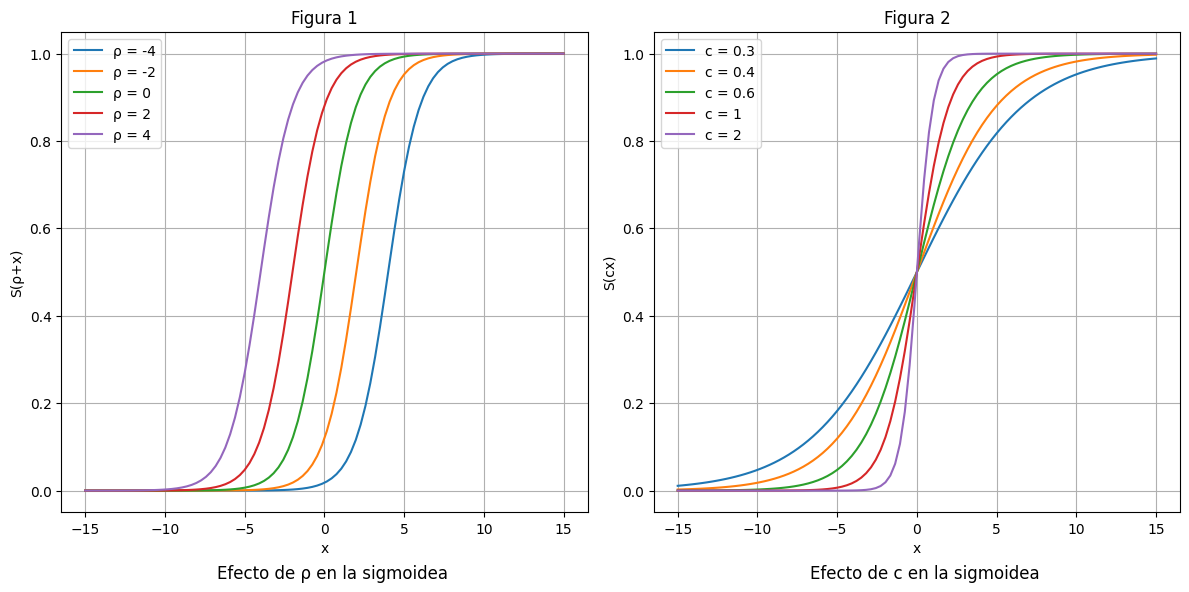

In [ ]:
x = np.linspace(-15, 15, 100)

plt.figure(figsize=(12, 6))
#rho
plt.subplot(1, 2, 1)
for rho in [-4, -2, 0, 2, 4]:
  plt.plot(x, S(x, rho=rho), label=f'ρ = {rho}')
plt.title("Figura 1")
plt.text(0.5, -0.2, "Efecto de ρ en la sigmoidea", ha="center", fontsize=12)
plt.xlabel("x")
plt.ylabel("S(ρ+x)")
plt.legend()
plt.grid(True)

# c
plt.subplot(1, 2, 2)
for c in [0.3, 0.4, 0.6, 1, 2]:
  plt.plot(x, S(x, c=c), label=f'c = {c}')
plt.title("Figura 2")
plt.text(0.5, -0.2, "Efecto de c en la sigmoidea", ha="center", fontsize=12)
plt.xlabel("x")
plt.ylabel("S(cx)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Como se muestra en la **Figura 1**, conforme varía el parametro $\rho$, la función $S$ desplaza sus valores de manetra transversal al eje de abscisas.
Paralelamente, como se muestra el la **Figura 2**, la variación del parametro $c$ proboca una aceleración, o desaceleración, en la transición de los valores de $S$ entre $0$ y $1$



---



**1.3.** Se estudia gráficamente la posibilidad de existencia de puntos fijos del sistema para c = 10.<br>
Los puntos fijos se presentan bajo la condición de que el campo vector sea nulo en ese determinado punto, es decir:
$$ \dot{x} = x-S(\rho + cx)= 0 $$
o lo que es lo mismo:
$$ x = S(\rho + cx)$$

Por lo tanto, estudiaremos los casos cuando los valores de la función sigmoidea $S$ coinciden con los valores de la función identidad del eje $X$.

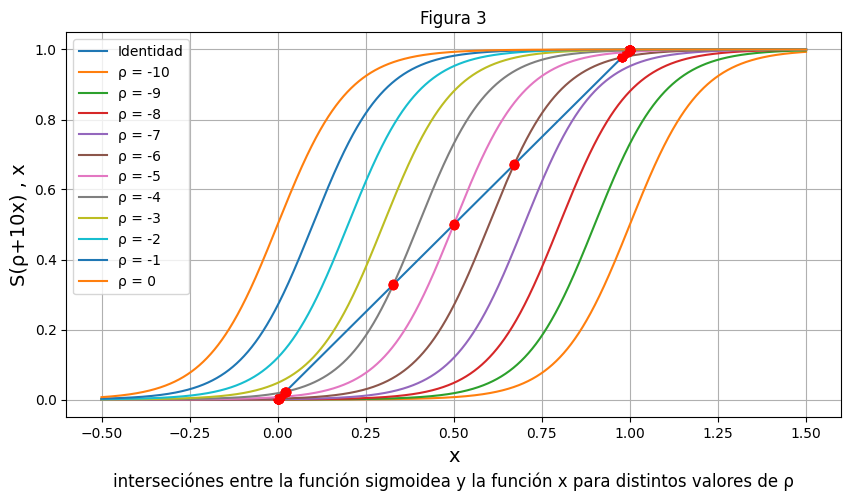

In [ ]:
def pf(X, rho, c):
  """para marcar los puntos donde se intersecan las rectas,
     como X y x son vectores con valores discretos  y no necesariamente contienen al punto
     en el cual  x = S(x, rho, c), decidimos hacer esta funcion para calcular los puntos fijos aproximadamente.
     consideramos no usar otros métodos numericos mas sofisticados para centrar su uso en el ejercicio 1.4."""
  for x in X:
    if np.abs(x - S(x, rho = rho, c=c))<0.0005:
      plt.plot(x, S(x, rho = rho, c=c), 'o', color='red')
  return None

X = np.linspace(-0.5,1.5, 10000)
x = np.linspace(0, 1, 100)
plt.figure(figsize=(10,5))
plt.plot(x,x, label='Identidad')
for rho in np.arange(-10,1,1):
  plt.plot(X, S(X, rho=rho, c =10), label=f'ρ = {rho}')
  pf(X, rho, 10)
plt.title("Figura 3")
plt.xlabel("x",fontsize=14)
plt.ylabel("S(ρ+10x) , x",fontsize=14)
plt.text(0.5, -0.25, "interseciónes entre la función sigmoidea y la función x para distintos valores de ρ", ha="center", fontsize=12)
plt.legend()
plt.grid()
plt.show()

Como se ve en la **Figura 3**, a medida de que el valor de $\rho$ varía, la funcion sigmoidea coincide con $x$ en uno, dos o tres valores determinados.

Para $ \rho \in [-\infty, -7]\cup[-3, +\infty] $ aproximadamente, podemos ver que existe únicamente un punto fijo. En cambio, para valores de $\rho \in[-6,-4]$ existen tres puntos fijos. Ahora, por la insuficiente precisión que brinda el análisis gráfico lo único que podemos afirmar es que alrededor de los valores de $\rho = -3.5$ y $\rho = -6.5$ existen dos bifurcaciones en las cuales el sistema pasa de un punto fijo a tres puntos fijos y de tres puntos fijos a un punto fijo respectivamente.



---



**1.4.** Utilizando herramientas numéricas, se buscan puntos fijos del sistema para c=10 y distintos valores de $\rho$ elegidos criteriosamente en base al ejercicio anterior. También se analiza la estabilidad a partir de sus derivadas numéricas y se hace un diagrama de bifurcaciones.<br>
Para encontrar los puntos fijos de la ecuación $\dot{x}=x−S(\rho+cx)$, se buscan sus raíces utilizando el método de la secante, ya que éste no requiere el calculo de la derivada de la función, a diferencia de otros métodos vistos en clase.

Se eligen los siguientes valores de $\rho$:

$r_1 = -10$,

$r_2 = ln(4+\sqrt{15})-5-\sqrt{15} \approx -6,81$

$r_3 = -5$,

$r_4 = ln(4-\sqrt{15})-5+\sqrt{15}\approx -3,19$

$r_5 = 0$,



Se eligen específicamente los valores de $r_2$ y $r_4$ porque son los valores que cumplen con la nulidad del campo vector en exactamente 2 puntos. Es decir, que en estos valores es cuando se produce la bifucación de los puntos fijos, donde la pendiente de la sigmoidea evaluada en ese punto vale exactamente 1 y por lo tanto es tangente a la recta $y=x$. produciendo los puntos críticos de bifurcación.

Se procede a resolver el ejercicio en las siguientes etapas:
 * **Parte 1:** Análisis general de los puntos fijos con $\rho$ = -5.
 * **Parte 2:** Definición de una función que busca los puntos fijos del sistema para los parámetros $\rho$ y $c$ dados.
 * **Parte 3:** Muestreo de los puntos fijos del sistema con $c$ = 10 y distintos valores de $\rho$
 * **Parte 4:** Análisis de estabilidad de los puntos fijos para distintos valores de $\rho$ con $c$ = 10.
 * **Parte 5:** Elaboración de un diagrama de bifurcaciones para visualizar los puntos fijos a medida que $\rho$ varía.


**Parte 1:** Se utiliza la función **secante** vista en clase, ejecutándola con $\rho = -5 $ y distintos valores de $a$ y $b$ entre los cuales se espera que exista un punto fijo y que el método de la secante converja.

In [ ]:
def camp_vect(x,rho):
  return x - S(x,rho,10)

def secante(f, a, b, rho, N):
#funcion vista en clase
    if f(a,rho)*f(b,rho) >= 0:
        print("El método de la secante falla")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = a_n - f(a_n,rho)*(b_n - a_n)/(f(b_n,rho) - f(a_n,rho))
        f_c_n = f(c_n,rho)
        if f(a_n,rho)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n,rho)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            print("Se encontró la solución exacta")
            return c_n
        else:
            print("El método de la secante falla")
            return None
    return a_n - f(a_n,rho)*(b_n - a_n)/(f(b_n,rho) - f(a_n,rho))
  #rho=-5,c=10 se esperan 3 PF
print(secante(camp_vect,0.30,0.70,-5,100))
print(secante(camp_vect,-1,0.30,-5,100))
print(secante(camp_vect,0.70,1.5,-5,100))

Se encontró la solución exacta
0.5
Se encontró la solución exacta
0.007188064182671624
Se encontró la solución exacta
0.9928119358173283


**Paso 2:** Debido a que es complicado encontrar de manera precisa los valores
$a$ y $b$ que aseguren la existencia de un **único** punto fijo entre ellos, especialmente cuando la función tiene dos puntos fijos muy cercanos, se implementó una función que primero busca valores aproximados de $a$ y $b$ donde la ecuación es cercana a cero, lo que sugiere la presencia de un punto fijo. Luego, se ejecuta el método de la secante para cada par $a,b$ encontrado, y se filtran los resultados que son suficientemente diferentes entre sí para identificar puntos fijos únicos.

In [ ]:
def secante_sin_prints(f, a, b, rho, N):
    if f(a,rho)*f(b,rho) >= 0:
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = a_n - f(a_n,rho)*(b_n - a_n)/(f(b_n,rho) - f(a_n,rho))
        f_c_n = f(c_n,rho)
        if f(a_n,rho)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n,rho)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            return c_n
        else:
            return None
    return a_n - f(a_n,rho)*(b_n - a_n)/(f(b_n,rho) - f(a_n,rho))



def puntos_fijos_estimados(rho, c, dif=0.005, espaciado=1000):
  ab = []
  X=np.linspace(-0.05,1.05, espaciado)
  for x in X:
    if np.abs(x - S(x, rho = rho, c=c))<dif:
      ab.append(x)
  return ab



def puntos_fijos_busqueda(ab,rho,secante_presicion=500,epsilon=0.00001):
  pfb = []
  for a in ab:
    for b in ab:
      if a<b:
        raiz = secante_sin_prints(camp_vect,a,b,rho,secante_presicion)
        if  raiz != None:
          if pfb == []:
            pfb.append(raiz)
          for i in pfb:
            if not any(np.abs(punto_fijo - raiz)<epsilon for punto_fijo in pfb):
              pfb.append(raiz) #lo agrega si no hay ninguno parecido
  pfb.sort()
  return pfb



def puntos_fijos(rho, c):
  ab = puntos_fijos_estimados(rho,c)
  return puntos_fijos_busqueda(ab,rho)

**Paso 3:** Se muestran los valores de los puntos fijos que encontró la función para los distintos valores de $\rho$. Se esperan 3 valores para $\rho = -5$, 2 valores para $\rho = r_2$ y $\rho = r_4$, y 1 solo para $\rho = -10$ y $\rho = 0 $.

In [ ]:
c = 10

# 1 punto fijo
rho1 = -10
print(f"Punto fijo para ρ = {rho1}")
pfrho1 = puntos_fijos(rho1,c)
print(pfrho1, "\n")

# 2 puntos fijos
r1=np.log(4+np.sqrt(15))-5-np.sqrt(15)
rho2 = r1
print(f"Puntos fijos para ρ = {rho2}")
pfrho2 = puntos_fijos(rho2,c)
print(pfrho2, "\n")

# 3 puntos fijos
rho3 = -5
print(f"Puntos fijos para ρ = {rho3}")
pfrho3 = puntos_fijos(rho3,c)
print(pfrho3, "\n")

# 2 puntos fijos
r2=np.log(4-np.sqrt(15))-5+np.sqrt(15)
rho4 = r2
print(f"Puntos fijos para ρ = {rho4}")
pfrho4 = puntos_fijos(rho4,c)
print(pfrho4, "\n")

# 1 punto fijo
rho5 = 0
print(f"Punto fijo para ρ = {rho5}")
pfrho5 = puntos_fijos(rho5,c)
print(pfrho5, "\n")

Punto fijo para ρ = -10
[4.5418491475998114e-05] 

Puntos fijos para ρ = -6.809546277311856
[0.0011143120160482045, 0.8873010752433732] 

Puntos fijos para ρ = -5
[0.007188064182671624, 0.5, 0.9928119358173283] 

Puntos fijos para ρ = -3.1904537226881446
[0.11269954720498329, 0.9988856879839517] 

Punto fijo para ρ = 0
[0.9999545815085239] 



**Parte 4:** se analiza la estabilidad de los puntos fijos a partir de la derivada numérica para distintos valores de $\rho$ con $c$ = 10.

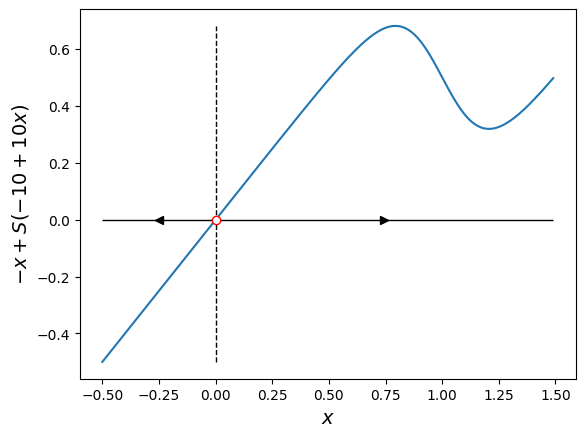

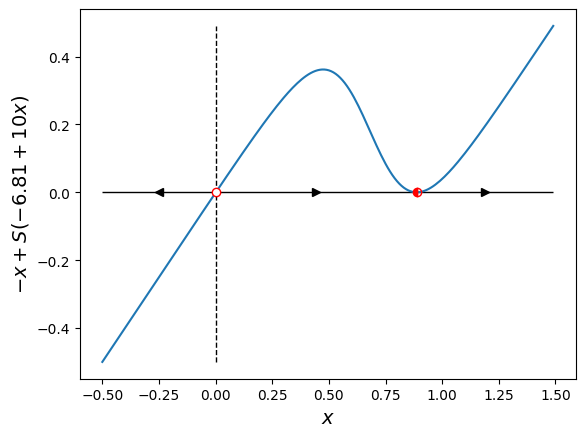

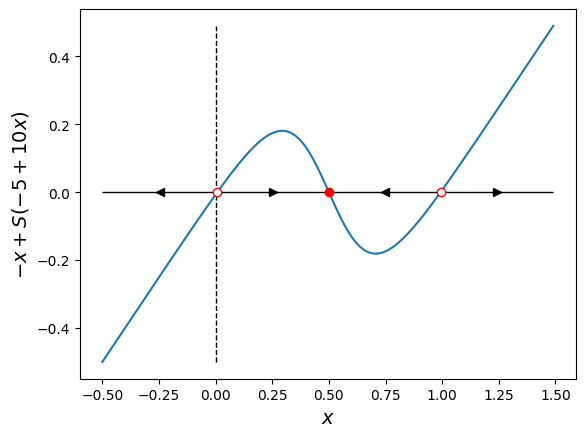

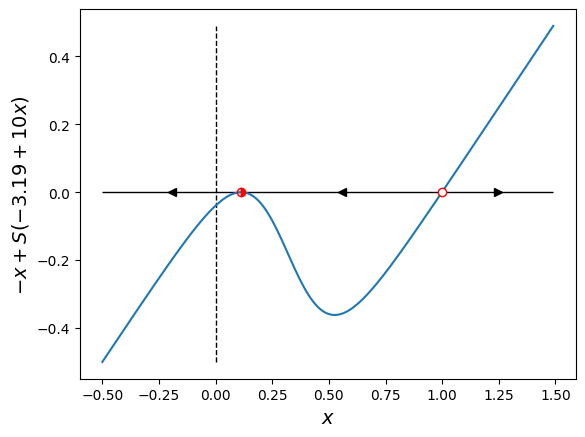

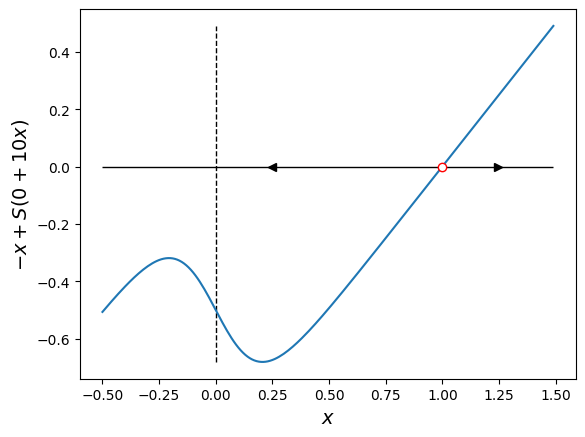

In [ ]:
#Analisis de estabilidad a partir de la derivada numérica.
def derivar(f,x0,rho,h=0.01):
    return (f(x0+h,rho)-f(x0-h,rho))/(2*h)

def graficarEstabilidad(rho, pfrho):
  pendientes = []
  for x0 in pfrho:
    pendientes.append(derivar(camp_vect, x0, rho))
  estabilidad = []
  for p in pendientes:
    estabilidad.append(int(p < 0))
  bifurcaciones = []
  for p in pendientes:
    if np.abs(p)>0.001:
      bifurcaciones.append(0)
    if np.abs(p) <0.001:
      if estabilidad[-1] == 0:
        bifurcaciones.append(1)
      else:
        bifurcaciones.append(2)
  x = np.arange(-0.5, 1.5, 0.01)
  y = camp_vect(x,rho)
  markerfcolors = ['w', 'r']
  markerecolors = ['r', 'r']
  fillstyles = ['full','right','left']
  xmarkerstyle = ['<', '>']
  plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
  plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
  plt.plot(x, y)

  for p in np.arange(len(pfrho)):
      x_markers_tmp = []
      puntosfijos_sorted = np.sort(pfrho)
      if puntosfijos_sorted[p] == puntosfijos_sorted.min():
          x_markers_tmp.append(x[0]+(puntosfijos_sorted[p]-x[0])/2)
      if puntosfijos_sorted[p] == puntosfijos_sorted.max():
          x_markers_tmp.append(x[-1]-(x[-1]-pfrho[p])/2)
      else:
          x_markers_tmp.append(puntosfijos_sorted[p]+(puntosfijos_sorted[p+1]-puntosfijos_sorted[p])/2)
      plt.plot(pfrho[p], 0, marker='o',
               markerfacecolor=markerfcolors[estabilidad[p]], markeredgecolor=markerecolors[estabilidad[p]],
               fillstyle=fillstyles[bifurcaciones[p]])

      for i in np.arange(len(x_markers_tmp)):
          plt.plot(x_markers_tmp[i], 0, c='k', marker=xmarkerstyle[int(camp_vect(x_markers_tmp[i],rho) > 0)])

  plt.xlabel('$x$', fontsize=14)
  plt.ylabel(f'$-x+S({round(rho,2)}+10x)$', fontsize=14)
  plt.show()

graficarEstabilidad(rho1, pfrho1)
graficarEstabilidad(rho2, pfrho2)
graficarEstabilidad(rho3, pfrho3)
graficarEstabilidad(rho4, pfrho4)
graficarEstabilidad(rho5, pfrho5)

En los gráficos se ilustran las funciones y sus puntos fijos para los distintos $\rho$. Los puntos fijos blancos son inestables, la derivada en ese punto es mayor a cero, los rojos son estables, la derivada es menor a cero, y los mitad de un color y mitad del otro corresponden a los puntos críticos donde se genera la bifurcación.

**Parte 5:** Se muestra el diagrama de bifurcaciones de los puntos fijos de la función a medida que varía $\rho$

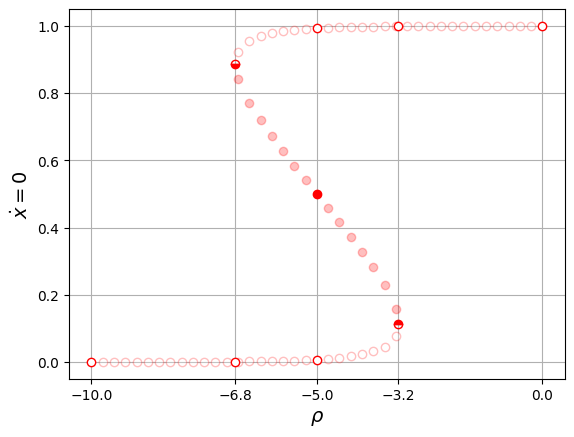

In [ ]:
#Diagrama de bifurcaciones para los valores de ρ elegidos.
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
x = np.arange(-0.5, 1.5, 0.01)
N = 20
rs = np.arange(-10, 0.25, 0.25)
rhos = [rho1,rho3,rho5]
for r in rs:
    puntosfijos = puntos_fijos(r,c)
    pendientes = []
    for x0 in puntosfijos:
        p = derivar(camp_vect, x0,r)
        pendientes.append(p)
        if (r in rhos):
          plt.plot(r, x0, 'o', markerfacecolor=markerfcolors[int(p < 0)], markeredgecolor=markerecolors[int(p < 0)])
        else:
          plt.plot(r, x0, 'o', markerfacecolor=markerfcolors[int(p < 0)], markeredgecolor=markerecolors[int(p < 0)], alpha=0.25)
puntosfijos = puntos_fijos(rho2,c)
plt.plot(rho2, puntosfijos[0], 'o', markerfacecolor='white', markeredgecolor='red')
plt.plot(rho2, puntosfijos[1], 'o', markerfacecolor='red', markeredgecolor='red',fillstyle='bottom')

puntosfijos = puntos_fijos(rho4,c)
plt.plot(rho4, puntosfijos[0], 'o', markerfacecolor='red', markeredgecolor='red',fillstyle='top')
plt.plot(rho4, puntosfijos[1], 'o', markerfacecolor='white', markeredgecolor='red')



plt.xlabel('$ρ$', fontsize=14)
plt.ylabel('$\dot{x}=0$', fontsize=14)
rhos = [rho1,rho2,rho3,rho4,rho5]
plt.xticks(rhos)
plt.grid()
plt.show()

Se ven dos bifurcaciones nodo-silla, en $r_2$ y $r_4$ ($r_2≈-6,81$, $r_4≈-3,19$).

A la izquierda de $r_4$, el gráfico muestra que hay tres puntos fijos, dos cercanos a 0, y otro cerca de 1. A medida que $\rho$ crece y se acerca más a $r_4$, estos dos puntos fijos se acercan hasta chocar y desaparecer, cuando $\rho = r_4$ es el único momento que hay dos puntos fijos (sin contar $r_2$), con valores más grandes que $r_4$, solo hay un punto fijo, cerca del 1.

Algo muy similar pasa alrededor de $r_2$, en este caso hay un punto fijo si $\rho< r_2$ y tres si $r_2<\rho<r_4$.



---



**1.5.** Se eligen 3 valores de $\rho$ que definan comportamientos del sistema cualitativamente distintos, $r_1$, $r_2$ y $r_3$. Se estudian las soluciones del sistema, obtenidas de integrar con el método de Euler, para distintos valores iniciales.

<ipython-input-2-bfd5e0094c9c>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(rho+c*x)))


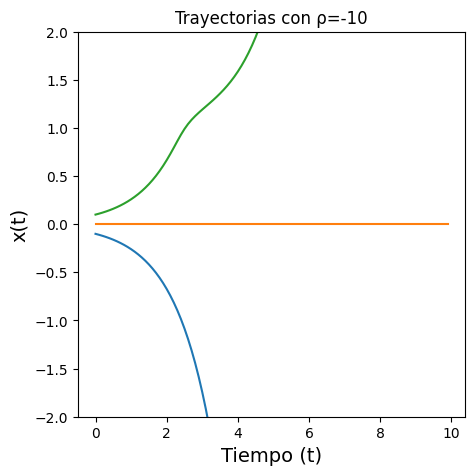

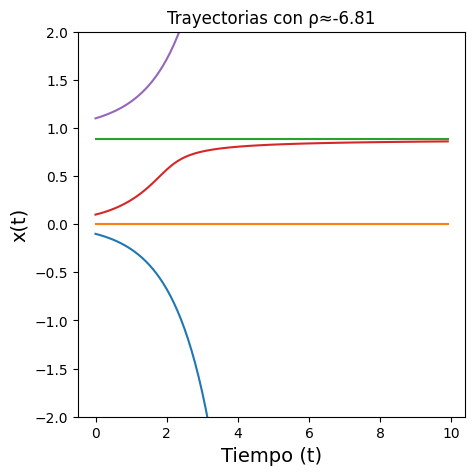

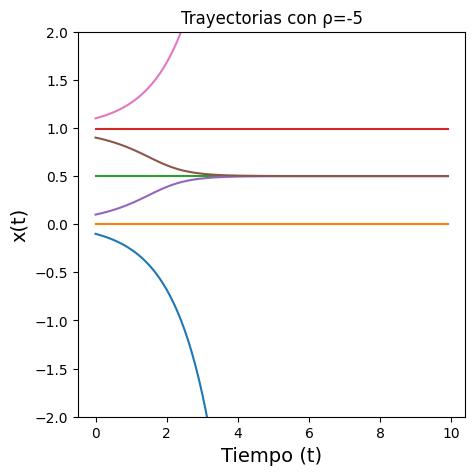

In [ ]:
def odeEuler(f, ci, rho, h=0.1, tmax=10):
    t = np.arange(0, tmax, h)
    x = np.zeros_like(t)
    x[0] = ci
    for i in range(len(t)-1):
      x[i+1] = x[i] + h*f(x[i],rho)
    return x, t

#ρ=-10
plt.figure(figsize=(5,5))
for ci in [-0.1, pfrho1[0],0.1]:
  N, t = odeEuler(camp_vect,ci,rho1)
  plt.plot(t, N)
plt.xlabel("Tiempo (t)", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.ylim(-2, 2)
plt.title("Trayectorias con ρ=-10")
plt.show()

#ρ≈-6.81
plt.figure(figsize=(5,5))
for ci in [-0.1, pfrho2[0], pfrho2[1],0.1, 1.1]:
  N, t = odeEuler(camp_vect,ci,rho2)
  plt.plot(t, N)
plt.xlabel("Tiempo (t)", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.ylim(-2, 2)
plt.title("Trayectorias con ρ≈-6.81")
plt.show()

#ρ=-5
plt.figure(figsize=(5,5))
for ci in [-0.1, pfrho3[0], pfrho3[1], pfrho3[2], 0.1, 0.9, 1.1]:
  N, t = odeEuler(camp_vect,ci,rho3)
  plt.plot(t, N)
plt.xlabel("Tiempo (t)", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.ylim(-2, 2)
plt.title("Trayectorias con ρ=-5")
plt.show()

### Trayectorias con ρ=-10:
Como era de esperar, se puede ver que la trayectoria que empieza exactamente en el punto fijo, cerca del 0, se queda en ese lugar a medida que el tiempo avanza. Por otro lado, las otras dos trayectorias demuestran que el punto fijo era inestable, ya que para valores iniciales cercanos, las trayecctorias se alejan del 0.

### Trayectorias con ρ≈-6.81:
De manera similar, se puede ver que cuando las condiciones iniciales son los puntos fijos de la función, las trayectorias son constantes. Se ve que el punto fijo cerca de 0 es repulsor, como se analizó en el punto 1.4. Además, se ve que el punto fijo cercano a 1 aleja las soluciones (cuando el tiempo avanza) para condiciones iniciales mayores y las atrae para menores.
### Trayectorias con ρ=-5:
Este gráfico, al igual que el del punto 1.4., muestra cómo la función tiene dos puntos fijos inestables y uno estable entre ellos.


---
# Ejercicio 2

Sea el siguiente sistema 2D

$$
\dot{x} = - x - x^{2} - y \\
\dot{y} = x - y
$$

**2.1.** Se define el sistema con una función de Python.


In [ ]:
def sistema(t,z):
  x = z[0]
  y = z[1]
  x_punto = -x-x**2-y
  y_punto = x-y
  return [x_punto, y_punto]



---



**2.2.** Se buscan puntos fijos a partir del estudio gráfico de las nulclinas.

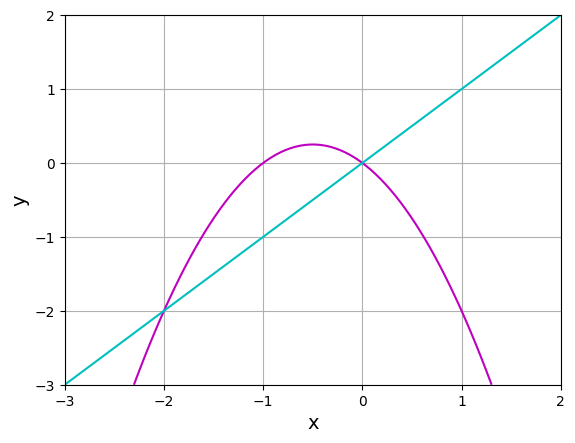

In [ ]:
def nulclinas(z):
    x = z[0]
    y = z[1]
    x_punto = -x-x**2-y
    y_punto = x-y
    return [x_punto, y_punto]

x = np.linspace(-3, 2, 100)
y = np.linspace(-3, 2, 100)
XX, YY = np.meshgrid(x, y)
DX, DY = nulclinas([XX, YY])
c = plt.contour(XX, YY, DX, levels=[0], colors=['m'])
c = plt.contour(XX, YY, DY, levels=[0], colors=['c'])
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()

Se puede observar que los puntos fijos son (-2,-2) y (0,0), ya que es donde se intersecan las nulclinas, es decir, donde $\dot{y}=\dot{x}=0$



---



**2.3.** Se buscan numéricamente los puntos fijos con `fsolve` de Scipy.



In [ ]:

N = 50
x0s = np.random.uniform(low=-2, high=2, size=(N,))
y0s = np.random.uniform(low=-2, high=2, size=(N,))
raices = []
for x0, y0 in zip(x0s, y0s):
    z0 = [x0, y0]
    raices.append(sp.optimize.fsolve(nulclinas, z0))
raices = np.unique(np.array(raices).round(2), axis=0)
print(f"Las raices son: {raices[0,:]} y {raices[1,:]}")

Las raices son: [-2. -2.] y [0. 0.]


<ipython-input-14-12ac7b7c65fe>:7: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  raices.append(sp.optimize.fsolve(nulclinas, z0))
<ipython-input-14-12ac7b7c65fe>:7: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  raices.append(sp.optimize.fsolve(nulclinas, z0))


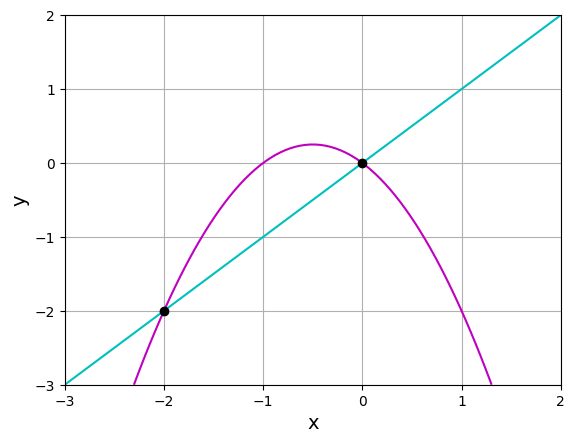

In [ ]:
c = plt.contour(XX, YY, DX, levels=[0], colors=['m'])
c = plt.contour(XX, YY, DY, levels=[0], colors=['c'])
plt.plot(raices[0,0],raices[0,1],'ko')
plt.plot(raices[1,0],raices[1,1],'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()

Los resultados coinciden con los observados.



---



**2.4.** Se define una función de Python genérica que tiene a la matriz Jacobiana en función de valores de "x" e "y". Se evalúa la matriz en los puntos fijos para estudiar su estabilidad.

In [ ]:
def mJacobiana(x,y):
   return np.array([[-2-2*x, -1], [1, -1]])

MJ1 = mJacobiana(raices[0,0],raices[0,1]).astype(int)
MJ2 = mJacobiana(raices[1,0],raices[1,1]).astype(int)
print(f"Matriz Jacobiana para el punto fijo ({int(raices[0,0])},{int(raices[0,1])}): MJ1 = \n{MJ1}")
print(f"Matriz Jacobiana para el punto fijo ({int(raices[1,0])},{int(raices[1,1])}): MJ2 =\n {MJ2}")

Matriz Jacobiana para el punto fijo (-2,-2): MJ1 = 
[[ 2 -1]
 [ 1 -1]]
Matriz Jacobiana para el punto fijo (0,0): MJ2 =
 [[-2 -1]
 [ 1 -1]]


Estudio de estabilidad a partir de la traza y determinante de la matriz.

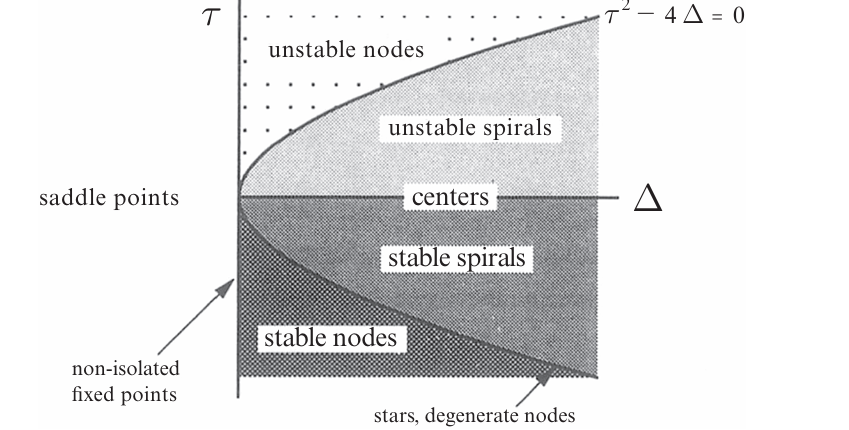

Figura tomada de Strogatz, S. H. (1994) . Nonlinear dynamics and chaos: With applications to physics, byology, chemistry, and engineering.
Addison-Wesley, p.138.

In [ ]:
traza1 = MJ1.trace()
traza2 = MJ2.trace()
det1 = np.linalg.det(MJ1)
det2 = np.linalg.det(MJ2)
print(f"MJ1:\n traza, τ = {traza1},\n determinante, Δ = {round(det1)},\n τ^2-4Δ = {traza1**2-4*round(det1)}.")
print(f"MJ2:\n traza, τ = {traza2},\n determinante, Δ = {round(det2)},\n τ^2-4Δ = {traza2**2-4*round(det2)}.")

MJ1:
 traza, τ = 1,
 determinante, Δ = -1,
 τ^2-4Δ = 5.
MJ2:
 traza, τ = -3,
 determinante, Δ = 3,
 τ^2-4Δ = -3.


Según la traza y el determinante de la matriz jacobiana evaluada en el punto fijo, podemos saber la estabilidad y el tipo de punto. Para esto alcanza con mirar el gráfico mostrado anteriormente.

### Punto fijo ($-2$,$-2$):

$\tau = 1, \Delta = -1 \implies$ es un punto nodo-silla.
### Punto fijo ($0$,$0$):

$\tau = -3, \Delta = 3$, hace falta calcular dónde cae el punto con respecto de la curva $\tau^2-4\Delta=0$. Como $\tau^2-4\Delta=-3< 0\implies$ es una espiral estable.

**Otra forma:** Estudio de estabilidad a partir de autovalores de la matriz jacobiana evaluada en el punto fijo.

In [ ]:
# Calcular autovalores
avals1, avects1 = np.linalg.eig(MJ1)
avals2, avects2 = np.linalg.eig(MJ2)
print(f"Autovalores:\n MJ1: {avals1}\n MJ2: {avals2}")

Autovalores:
 MJ1: [ 1.61803399 -0.61803399]
 MJ2: [-1.5+0.8660254j -1.5-0.8660254j]


### Punto fijo ($-2$,$-2$):

Como tiene un autovalor real positivo y otro negativo, es un punto nodo-silla
### Punto fijo ($0$,$0$):
La parte imaginaria de los autovalores sugiere que el sistema tiene un comportamiento oscilatorio alrededor del punto fijo. Como la parte real es distinta de 0, no es un centro. Es una espiral, y es estable ya que es negativa.



---



**2.5.** Se grafica el campo vector para interpretar las líneas de campo obtenidas en referencia al ítem anterior.

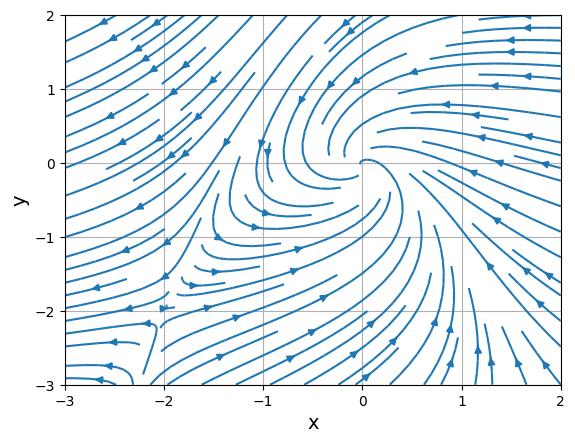

In [ ]:
X,Y = np.meshgrid(np.linspace(-3,2,15), np.linspace(-3,2,15))
DX,DY = sistema(0,[X,Y])
plt.streamplot(X, Y, DX, DY, density=1, minlength=.1, arrowstyle='-|>', arrowsize=1)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()

En este gráfico se puede observar que el punto $(0,0)$ es efectivamente una espiral estable. Las soluciones convergen al él en forma espiralada a medida que el tiempo avanza.
En cambio, alrededor del punto $(-2,-2)$ se ve que hay una dirección en la que las trayectorias se acercan al punto, pero en la dirección de su autovector asociado al autovalor positivo, las trayectorias se alejan. Esto confirma que es un punto de ensilladura.



---



**2.6.** Se muestran trayectorias en el espacio de fases que describan comportamientos del sistema.

In [ ]:
avects1


array([[0.93417236, 0.35682209],
       [0.35682209, 0.93417236]])

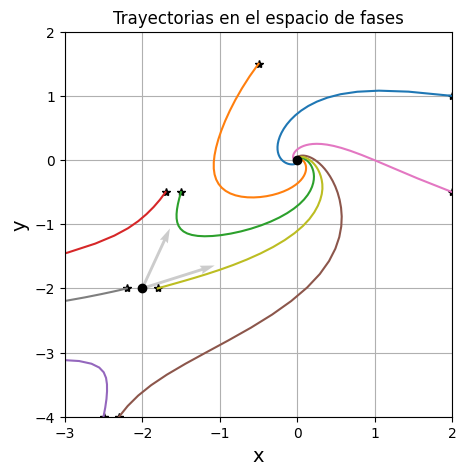

In [ ]:
plt.figure(figsize=(5,5))
dt = 0.1
tmaxs = [4,5,5,1,2,5,3,1,4]
sol = []
ps=[[2,1],[-0.5,1.5],[-1.5,-0.5],[-1.7,-0.5],[-2.5,-4],[-2.3,-4],[2,-0.5],[-2.2,-2],[-1.8,-2]]
for p in range(len(ps)):
  t = np.arange(0, tmaxs[p], dt)
  sol.append(solve_ivp(sistema, [t[0], t[-1]], ps[p], t_eval=t, method='RK45'))
  plt.plot(ps[p][0],ps[p][1], 'k*')



for i in sol:
  plt.plot(i.y[0, :], i.y[1, :])

plt.plot(0, 0, 'ko')
plt.plot(-2,-2, 'ko')
plt.quiver(-2,-2,avects1[0,0],avects1[0,1],scale_units='xy', angles='xy',scale=1,alpha=0.2)
plt.quiver(-2,-2,avects1[1,0],avects1[1,1],scale_units='xy', angles='xy',scale=1,alpha=0.2)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Trayectorias en el espacio de fases')
plt.xlim(-3,2)
plt.ylim(-4,2)
plt.grid()
plt.show()


Las estrillas negras marcan la condición inicial y las lineas de colores, las trayectorias. Los puntos negros son los puntos fijos y las flechas que salen del $(-2,-2)$ son los autovectores de la matriz jacobiana del sistema evaluada en ese punto.
Se puede observar de forma clara que el punto $(0,0)$ es un espiral estable, lo que concuerda con el análisis previamente realizado. Por otro lado, las trayectorias cercanas al $(-2,-2)$ se alejan a medida que avanza el tiempo en la dirección del autovector asociado al autovalor positivo, y se acercan al punto ensilladura en la dirección del otro autovector.

---
# Ejercicio 3

**Modelo SIR**

Para modelar la evolución de una infección en una población se la puede dividir en tres grupos: los *susceptibles* de contraer la enfermedad ($S$), los *infectados* ($I$) y los *recuperados* ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:

$$
\frac{dS}{dt} = -\beta \frac{S\,I}{N}\\
\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma\, I\\
\frac{dR}{dt} = \gamma\, I
$$

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente y $N$ la población total.

**3.1.** Considerando la cantidad de habitantes $N = 10000$ y que inicialmente todas las personas son susceptibles, supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de 10 días (es decir, una tasa $\gamma$ de 1/10). Si inicialmente hay una única persona enferma, se observa las siguientes evoluciones de las poblaciones de cada grupo.

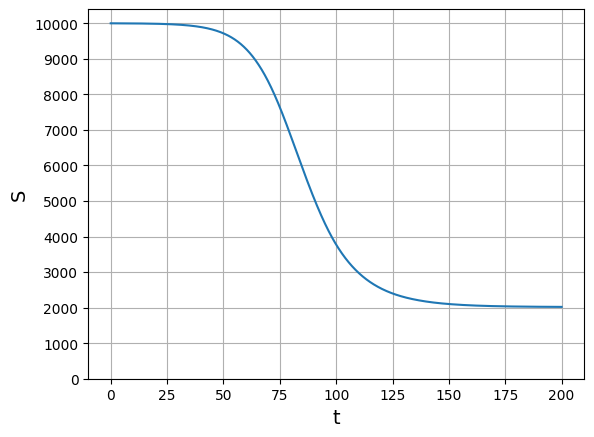

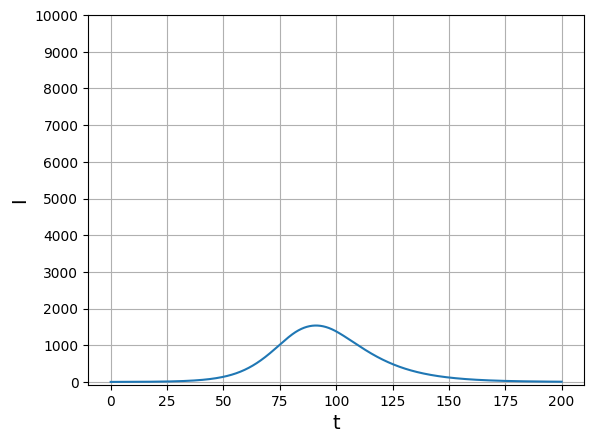

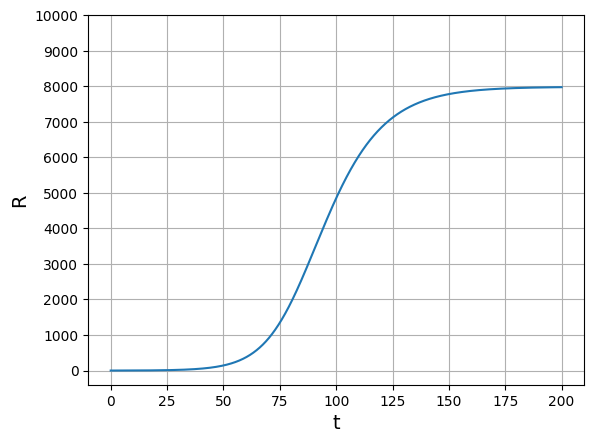

In [ ]:
def SIR(t, X, beta=0.2, gamma=1/10, N=10000):
    s, i, r = X
    s_dot = -beta*s*i/N
    i_dot = beta*s*i/N - gamma*i
    r_dot = gamma*i
    return [s_dot, i_dot, r_dot]

dt = 0.001
t_max = 200
t_eval = np.arange(0, t_max, dt)
t_span = [t_eval[0], t_eval[-1]]
X0 = [9999, 1, 0]

labels = ['S', 'I', 'R']
sol = sp.integrate.solve_ivp(SIR, t_span, X0, t_eval=t_eval)
for i in np.arange(len(labels)):
  plt.plot(sol.t, sol.y[i])
  plt.xlabel('t', fontsize=14)
  plt.ylabel(labels[i], fontsize=14)
  plt.yticks(range(0,10001,1000))
  plt.grid()
  plt.show()

A medida que transcurre el tiempo, podemos ver cómo se desarrolla la enfermedad afectando a los tres tipos de población. Al principio la población susceptible comienza a descender a medida que las personas en ésta se van enfermando, produciendo un aumento en la población infectada. Luego de 10 dias las primeras personas enfermas comienzan a sanar lentamente, por lo tanto, se descuentan de la población infectada y pasan a contar en la población recuperada.
Consideramos que la población recuperada genera una fuerte inmunidad a la enfermedad, y por lo tanto no puede volver a enfermarse. Entonces, a partir de un determinado momento, la cantidad de infectados comienza a disminuir hasta que se erradica la enfermedad.



---



**3.2.**Considerando que no se producen fallecimientos y que cada persona solo puede pertenecer a un grupo a la vez, verificamos que la población se mantiene constante graficando la suma de los valores de $S, I$ y $R$ ($S+I+R$ ) para cada instante de tiempo.

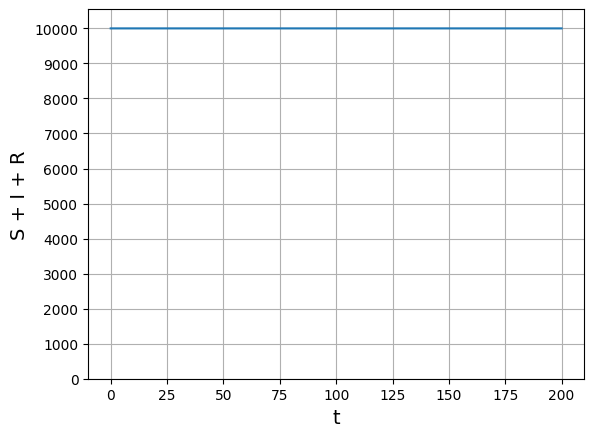

In [ ]:

plt.plot(sol.t, sol.y[0]+sol.y[1]+sol.y[2])
plt.xlabel('t', fontsize=14)
plt.ylabel("S + I + R", fontsize=14)
plt.yticks(range(0,10001,1000))
plt.grid()
plt.show()



---



**3.3.** Para determinar el tiempo a partir del cual la cantidad de infecciones llega a su maximo y comienza a descender hay dos formas, se puede buscar el valor maximo en el vector sol.y[1] que contiene los valores de $I$ en determinados puntos o tambien es posible buscar el maximo de la manera tradicionar, calculando la funcion derivada de $I$ y buscando sus raices.
En éste trabajo practico realizaremos ambos métodos y compararemos sus resultados.

**Metodo 1:** primero buscamos el máximo en el vector que resulta de ejecutar solv_ivp y contiene los valores de $I$, y luego para una mejor precisión evaluamos un equiespaciado en la funcion que mejor aproxima los puntos de $I$ tambien brindada por solv_ivp.

In [ ]:
dt = 0.001
t_max = 200
t_eval = np.arange(0, t_max, dt)
t_span = [t_eval[0], t_eval[-1]]
X0 = [9999, 1, 0]

sol = sp.integrate.solve_ivp(SIR, t_span, X0, t_eval=t_eval, method='RK45')
solfunc = sp.integrate.solve_ivp(SIR, t_span, X0, t_eval=t_eval, method='RK45', dense_output=True)
i_max_aprox = np.argmax(sol.y[1])
print("Tiempo donde I es maximo aproximadamente:", sol.t[i_max_aprox])
print("Valor maximo de I aproximadamente:", sol.y[1][i_max_aprox],'\n')
X = np.linspace(sol.t[i_max_aprox]-1,sol.t[i_max_aprox]+1,10000)
solfunc_valuated = solfunc.sol(X)[1]
i_max1 = np.max(solfunc_valuated)
t_max1=X[np.argmax(solfunc_valuated)]
print("Tiempo donde I es maximo:", t_max1)
print("Valor maximo de I:", i_max1)


Tiempo donde I es maximo aproximadamente: 91.043
Valor maximo de I aproximadamente: 1538.0016184666708 

Tiempo donde I es maximo: 91.042699969997
Valor maximo de I: 1538.0016187238748


**Método 2:** para el cálculo de la raiz de la derivada, ya se tienen calculados previamente los valores de $S(t)$ e $I(t)$, por lo tanto, se definine la función $\frac{dI}{dt}$ como $\beta \frac{S(t)\,I(t)}{N} - \gamma\, I$
y se calcula $\frac{dI}{dt}=0$ utilizando el método de la secante.

In [ ]:
def dI_dt(t, beta=0.2, gamma=1/10, N=10000):
    "reconstruccion de la ecuacion diferencial"
    s = solfunc.sol(t)[0]
    i = solfunc.sol(t)[1]
    return (beta*s*i/N - gamma*i)


t_max2 =secante(dI_dt,89,92,200)
i_max2 =solfunc.sol(t_max2)[1]
print("Tiempo donde I es maximo:",t_max2)
print("Valor maximo de I:", i_max2)



Tiempo donde I es maximo: 90.65432100092991
Valor maximo de I: 1537.6778548925595


Como podemos observar hay una discrepancia entre los valores de tiempo en los cuales la funcion $I(t)$ es maxima y la funcion $\frac{dI}{dt} =0$. Suponemos que esta diferencia es devido al método de integración utilizado y a la acumulación de errores de aproximación cometidos a lo largo de la ejecución.
En el siguiente grafico se puede ver como no interseca el maximo de la funcion y su derivadaen $y = 0$

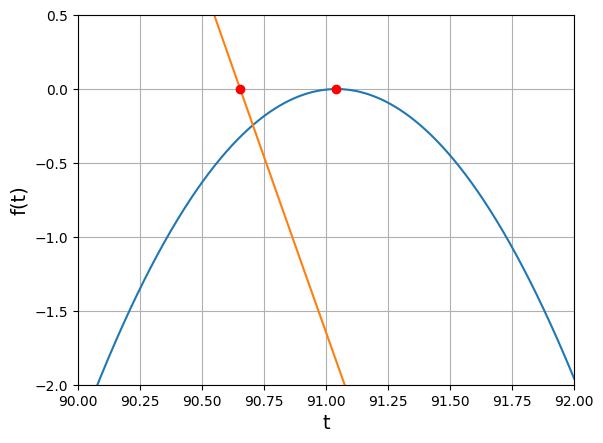

In [ ]:
plt.plot(sol.t, sol.y[1]-np.max(sol.y[1]))
plt.plot(sol.t, dI_dt(sol.t))
plt.plot(t_max1, 0, 'ro')
plt.plot(t_max2, 0, 'ro')
plt.xlabel('t', fontsize=14)
plt.ylabel('f(t)', fontsize=14)
plt.xlim(90,92)
plt.ylim(-2,0.5)
plt.grid()

Decidimos seguir con el ejercicio tomando los valores en las variables t_max1 como $t$ e i_max1 como $I(t)$. valores para los cuales $I(t)$ es máximo.
Procedemos a graficar $I(t)$ y marcar su punto máximo.

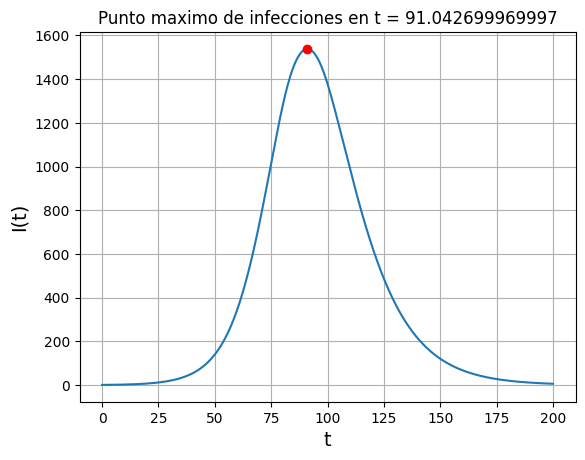

In [ ]:
plt.plot(sol.t, sol.y[1])
plt.plot(t_max1, i_max1, 'ro')
plt.xlabel('t', fontsize=14)
plt.ylabel('I(t)', fontsize=14)
plt.title(f'Punto maximo de infecciones en t = {t_max1}')
plt.grid()
plt.show()